In [364]:
import numpy as np
import torch
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

import spin_system, utils, particles, res_field_algorithm, constants, spectral_integration, mesher, spectra_manager, particles
from importlib import reload
reload(mesher)
reload(spin_system)
reload(utils)
reload(particles)
reload(res_field_algorithm)
reload(constants)
reload(spectral_integration)
reload(spectra_manager)
reload(mesher)
reload(mesher.general_mesh)
reload(mesher.delanay_mesh)
reload(particles)

<module 'particles' from 'D:\\ITC\\РНФ_Курганский_2024\\pythonProject\\particles\\__init__.py'>

In [365]:
import numpy as np
import torch
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

import mesher, spin_system, utils, particles, res_field_algorithm, spectra_manager, constants
from importlib import reload
reload(mesher)
reload(spin_system)
reload(utils)
reload(particles)
reload(res_field_algorithm)
reload(spectra_manager)
reload(constants)

<module 'constants' from 'D:\\ITC\\РНФ_Курганский_2024\\pythonProject\\constants.py'>

In [366]:
mesh = mesher.DelaunayMeshClough(phi_limit =  np.pi / 2, initial_grid_frequency=20, interpolate=False)

rotation_matrices = mesh.create_rotation_matrices()

In [367]:
matrix = torch.eye(3)

In [368]:
ham_strained = torch.tensor([[1.1, 1.1, 1.3], [1.2, 1.3, 1.2]])

In [369]:
components = torch.tensor([2.0015, 2.0015, 2.0015])
frame = torch.tensor([0, 0, 0.0])
strain = torch.tensor([0.002, 0.001, 0.002]) / 2000
#D = 88.78 * 1e6
#E = 31.9475 * 1e6
D = 2 * 88.78 * 1e6
E = 2 * 31.9475 * 1e6
Dx = -1/3 * D + E
Dy = -1/3 * D - E
Dz = 2/3 * D

D_str = 30.957
E_str = 20.0
Dx_str = -1/3 * D_str + E_str
Dy_str = -1/3 * D_str - E_str
Dz_str = 2/3 * D_str

strain_e_e = torch.tensor([Dx_str, Dy_str, Dz_str]) * (constants.PLANCK / constants.BOHR) * 1e6

J = 0.3
J = (J * 100) * 3 * 1e8 # in Hz
components_dipole =  torch.tensor([Dx, Dy, Dz]) + torch.tensor([J, J, J])


some_interaction_e_0 = spin_system.Interaction(components, frame, strain)
some_interaction_e_1 = spin_system.Interaction(components, frame, strain)
some_interaction_e_e = spin_system.Interaction(components_dipole, frame, strain_e_e)

In [370]:
some_interaction_e_e

In [371]:
electron_1 = particles.Electron(spin=1 / 2)
electron_2 = particles.Electron(spin=1 / 2)
g_1 = some_interaction_e_0
g_2 = some_interaction_e_1
electrons = [electron_1, electron_2]
humiltonian_strained = 3 * torch.tensor([10, 10, 10]) * (constants.PLANCK / constants.BOHR) * 4 * 1e5
system = spin_system.SpinSystem(
    electrons=electrons,
    g_tensors=[g_1, g_2],
    electron_electron=[(0, 1, some_interaction_e_e)])

In [372]:
system

In [373]:
rotation_matrices.shape

torch.Size([192, 3, 3])

In [374]:
powder = spin_system.MultiOrientedSample(system, humiltonian_strained, rotation_matrices)

In [375]:
powder.calculate_derivative_max().shape

torch.Size([192])

In [376]:
resonator = res_field_algorithm.ResField()
F, Gx, Gy, Gz = powder.get_hamiltonian_terms()
resonance_frequency = torch.tensor(9.727265 * 1e9)

In [377]:
B_low = torch.tensor([0.0]).expand(56)
B_high = torch.tensor([1000]).expand(56)

In [378]:
v = torch.tensor(0.0)
v.unsqueeze(-1)

tensor([0.])

In [379]:
spectra_creator = spectra_manager.SpectraCreatorTimeResolved(powder.spin_system.dim, tuple(), mesh)

In [380]:
with torch.no_grad():
    fields_1 = torch.linspace(0.340, 0.355, 1000)
    answer_1 = spectra_creator(powder, resonance_frequency, fields_1)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'Tensor'

In [381]:
import matplotlib.pyplot as plt

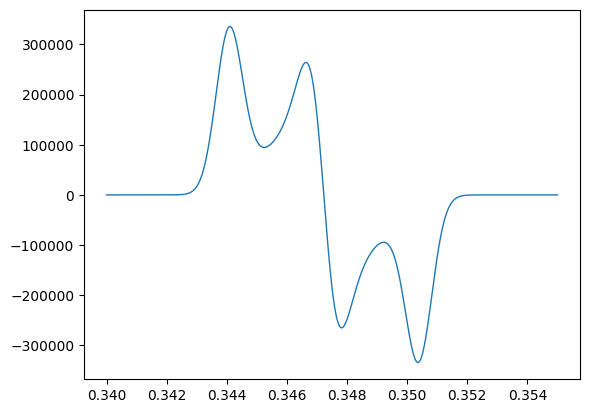

In [116]:
plt.plot(fields_1.numpy(), answer_1.numpy(),linewidth=1.0)
#plt.plot(fields_1.numpy(), answer_2.numpy(),linewidth=1.0)

In [3824]:
mesh_size = (56,)
fields = torch.linspace(0.10, 0.45, 1000)
B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)

In [ ]:
def print_answers():
    mesh_size = (56,)
    fields = torch.linspace(0.30, 0.33, 2000)
    B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
    B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
    F, Gx, Gy, Gz = powder.get_hamiltonian_terms()
    bathces = res_field_algorithm.ResField()(powder, resonance_frequency, B_low, B_high, F, Gz)
    (vectors_u, vectors_v), (valid_lvl_down, valid_lvl_up), B_trans, mask_trans, mask_triu, indexes, resonance_energies = bathces[0]
    
    fields = torch.linspace(0.31, 0.33, 2000)
    B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
    B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
    F, Gx, Gy, Gz = powder.get_hamiltonian_terms()
    bathces = res_field_algorithm.ResField()(powder, resonance_frequency, B_low, B_high, F, Gz)
    (vectors_u_2, vectors_v_2), (valid_lvl_down_2, valid_lvl_up_2), B_trans_2, mask_trans_2, mask_triu_2, indexes_2, resonance_energies_2 = bathces[0]

    #print(f"B_trans \n: {1 - B_trans / B_trans_2}")
    #print(f"mask_triu \n: {mask_triu}, {mask_triu_2}")
    #print(f"energies \n: {1 - resonance_energies / resonance_energies_2}")
    print(B_trans)
    #delta = (1 - ((vectors_u + 1e-22) / (vectors_u_2 + 1e-22)).abs())
    delta = (vectors_u  - vectors_u_2)
    max_u = vectors_u.abs().max(dim=(-1))[0] + vectors_u_2.abs().max(dim=(-1))[0]
    res = (delta / max_u[..., None]).abs()
    mask = (res >0.6).any(dim=(0, 2))
    print(res[:, 3, :] > 0.6)
    print(f"vectors_u \n: {delta[5, 3, :]}")
    print(f"vectors_u \n: {vectors_u_2[5, 3, :]}")
    print(f"vectors_u \n: {vectors_u[5, 3, :]}")

In [ ]:
print_answers()

In [1374]:
mesh_size = (56,)
fields = torch.linspace(0.10, 0.45, 1000)
B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
print_answers(B_low, B_high)

NameError: name 'print_answers' is not defined

In [1375]:
mesh_size = (56,)
fields = torch.linspace(0.30, 0.40, 1000)
B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
print_answers(B_low, B_high)

NameError: name 'print_answers' is not defined

In [1376]:
fields_1 = torch.linspace(0.305, 0.70, 2000)

In [ ]:
components = torch.tensor([2.05, 2.05, 2.3])
resonance_frequency = torch.tensor([9.8 * 1e9])
g_perp = 2.3
g_parall = 2.05
factor_1 = (1/4) * (constants.BOHR * g_perp ** 2 / (constants.PLANCK * resonance_frequency * (g_perp - g_parall))) ** 0.5
factor_2 = 1 / (fields_1 - constants.PLANCK * resonance_frequency / (g_perp * constants.BOHR )) ** 0.5

In [ ]:
answer = factor_1 * factor_2

In [ ]:
plt.plot(fields_1.numpy(), answer.numpy())

In [1565]:
post_processor = mesher.MeshProcessor(init_grid_frequency=5, interpolating_grid_frequency=6, phi_limit= 2* np.pi, interpolate=True)

In [1566]:
f_values = np.stack((post_processor.base_vertices[:, 0]**2, post_processor.base_vertices[:, 1]**2))

In [1567]:
f_values.shape

(2, 12)

In [1568]:
f_extended = post_processor.post_process(f_values)

ValueError: could not broadcast input array from shape (2,0) into shape (2,6)

In [1563]:
import numpy as np

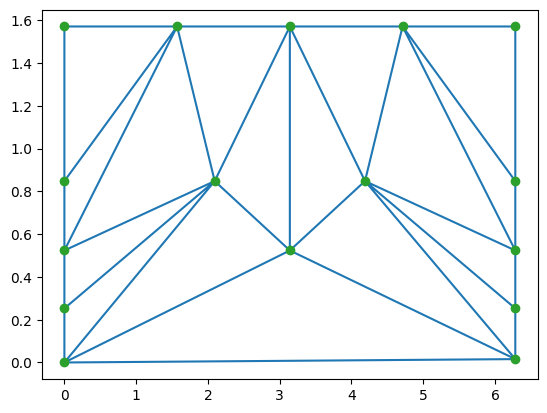

In [1564]:
tri = Delaunay(post_processor.final_vertices)
points = tri.points
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [ ]:
points

In [1538]:
import numpy as np
from scipy.spatial import Delaunay

def _create_base_vertices(grid_frequency, phi_limit):
    """Generates base grid vertices and extended vertices up to phi_limit."""
    initial_points = np.array([[0.0, 0.01], [phi_limit/2, 1/ (grid_frequency-1)], [phi_limit, 0.01]])

    k_values = np.arange(1, grid_frequency)
    q_per_k = [np.arange(k) for k in k_values]
    q_values = np.concatenate(q_per_k)
    k_repeated = np.repeat(k_values, k_values)

    phi = phi_limit * q_values / k_repeated
    factor = k_repeated / (grid_frequency - 1)

    #theta = (np.pi / 2) * k_repeated / (grid_frequency - 1)
    theta = np.arcsin(factor)
    
    
    
    grid_points = np.column_stack((phi, theta))

    base_vertices = np.vstack((initial_points, grid_points))

    #theta_2pi = (np.pi / 2) * k_values / (grid_frequency - 1)
    theta_2pi = np.arcsin(k_values / (grid_frequency - 1))
    additional_points = np.column_stack((np.full_like(theta_2pi, phi_limit), theta_2pi))
    extended_vertices = np.vstack((base_vertices, additional_points))

    return base_vertices, extended_vertices

def spherical_to_cartesian(phi, theta, radius=1):
    """Converts spherical coordinates to Cartesian (assuming unit sphere)."""
    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)
    return np.column_stack((x, y, z))

def stereographic_projection(x, y, z):
    """Projects 3D points onto a 2D plane using stereographic projection."""
    return np.column_stack((x / (1 - z), y / (1 - z)))  # Stereographic projection

In [1539]:
_, base_vertices = _create_base_vertices(grid_frequency, 2 * np.pi)

In [ ]:
tri = Delaunay(base_vertices)
points = base_vertices
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [1519]:
base_vertices

array([[0.        , 0.01      ],
       [6.28318531, 0.01      ],
       [0.        , 0.39269908],
       [0.        , 0.78539816],
       [3.14159265, 0.78539816],
       [0.        , 1.17809725],
       [2.0943951 , 1.17809725],
       [4.1887902 , 1.17809725],
       [0.        , 1.57079633],
       [1.57079633, 1.57079633],
       [3.14159265, 1.57079633],
       [4.71238898, 1.57079633],
       [6.28318531, 0.39269908],
       [6.28318531, 0.78539816],
       [6.28318531, 1.17809725],
       [6.28318531, 1.57079633]])

In [1508]:
grid_frequency = 5

In [1516]:
a = np.linspace(0, 1, grid_frequency)

In [1517]:
theta = np.arcsin(a)

In [1518]:
theta

array([0.        , 0.25268026, 0.52359878, 0.84806208, 1.57079633])

In [222]:
import torch

def check_and_find_roots(a3, a2, a1, a0, max_iter=20, tol=1e-6):
    """
    Checks for roots in the interval (0, 1) and finds them for cubic polynomials using the derivative and Newton-Raphson method.

    Args:
        a3, a2, a1, a0 (torch.Tensor): Coefficients of the cubic polynomials (shape: (N,)).
        max_iter (int): Maximum number of iterations for Newton-Raphson.
        tol (float): Tolerance for convergence and root checking.

    Returns:
        has_roots (torch.Tensor): Boolean tensor indicating if each polynomial has roots in (0, 1).
        roots_list (list of torch.Tensor): List containing roots in (0, 1) for each polynomial.
    """
    device = a3.device
    dtype = a3.dtype
    N = a3.shape[0]

    # Compute critical points t1 and t2 (roots of derivative)
    with torch.no_grad():
        D = (2 * a2)**2 - 12 * a3 * a1  # Discriminant
        sqrt_D = torch.sqrt(torch.abs(D))
        t1 = (-2 * a2 + sqrt_D) / (6 * a3)
        t2 = (-2 * a2 - sqrt_D) / (6 * a3)

        # Mask for valid critical points (real and in [0, 1])
        valid_t1 = (D >= 0) & (t1 >= 0) & (t1 <= 1)
        valid_t2 = (D >= 0) & (t2 >= 0) & (t2 <= 1)
        t1 = torch.where(valid_t1, t1, torch.nan)
        t2 = torch.where(valid_t2, t2, torch.nan)

        # Stack 0, t1, t2, 1 and sort
        points = torch.stack([
            torch.zeros(N, device=device, dtype=dtype),
            t1,
            t2,
            torch.ones(N, device=device, dtype=dtype)
        ], dim=1)
        sorted_points, _ = torch.sort(points, dim=1)

        # Generate intervals (start and end)
        intervals_start = sorted_points[:, :-1]
        intervals_end = sorted_points[:, 1:]

        # Mask for valid intervals (start < end and both not NaN)
        mask_valid = (intervals_start < intervals_end) & ~torch.isnan(intervals_start) & ~torch.isnan(intervals_end)

        # Compute f at interval endpoints
        a3_exp = a3.unsqueeze(1)
        a2_exp = a2.unsqueeze(1)
        a1_exp = a1.unsqueeze(1)
        a0_exp = a0.unsqueeze(1)
        f_start = a3_exp * intervals_start**3 + a2_exp * intervals_start**2 + a1_exp * intervals_start + a0_exp
        f_end = a3_exp * intervals_end**3 + a2_exp * intervals_end**2 + a1_exp * intervals_end + a0_exp
        sign_change = (f_start * f_end) < 0
        mask_interval = mask_valid & sign_change

        # Flatten all valid intervals and their polynomial indices
        flat_mask = mask_interval.flatten()
        valid_starts = intervals_start.flatten()[flat_mask]
        valid_ends = intervals_end.flatten()[flat_mask]
        batch_indices = torch.arange(N, device=device).unsqueeze(1).expand(N, 3).flatten()[flat_mask]

        if len(batch_indices) == 0:
            return torch.zeros(N, dtype=torch.bool, device=device), [torch.tensor([], dtype=dtype, device=device) for _ in range(N)]

        # Gather coefficients for valid intervals
        a3_valid = a3[batch_indices]
        a2_valid = a2[batch_indices]
        a1_valid = a1[batch_indices]
        a0_valid = a0[batch_indices]

        # Initialize Newton-Raphson
        t = (valid_starts + valid_ends) / 2.0
        for _ in range(max_iter):
            f_t = a3_valid * t**3 + a2_valid * t**2 + a1_valid * t + a0_valid
            f_prime_t = 3 * a3_valid * t**2 + 2 * a2_valid * t + a1_valid
            delta = f_t / (f_prime_t + 1e-12)  # Avoid division by zero
            t_new = t - delta

            # Check if new t is within bounds, else use bisection
            out_of_bounds = (t_new < valid_starts) | (t_new > valid_ends)
            t_new = torch.where(out_of_bounds, (valid_starts + valid_ends) / 2.0, t_new)

            # Update t and check convergence
            t = t_new

        # Check final convergence and validity
        f_t = a3_valid * t**3 + a2_valid * t**2 + a1_valid * t + a0_valid
        valid_root = (t >= valid_starts) & (t <= valid_ends) & (f_t.abs() <= tol)
        roots = t[valid_root]
        valid_batch_indices = batch_indices[valid_root]

    # Collect roots into list
    roots_list = [[] for _ in range(N)]
    for idx, root in zip(valid_batch_indices.cpu().numpy(), roots.cpu().numpy()):
        roots_list[idx].append(root)
    
    # Deduplicate and convert to tensors
    roots_tensors = []
    has_roots = torch.zeros(N, dtype=torch.bool, device=device)
    for i in range(N):
        unique_roots = torch.unique(torch.tensor(roots_list[i], dtype=dtype, device=device))
        # Filter roots within (0, 1) strictly (endpoints excluded)
        in_interval = (unique_roots > 0) & (unique_roots < 1)
        unique_roots = unique_roots[in_interval]
        roots_tensors.append(unique_roots)
        has_roots[i] = len(unique_roots) > 0

    return has_roots, roots_tensors